<a href="https://colab.research.google.com/github/Avi9530/21Project21Days/blob/main/8CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

Load CIFAR-100 Dataset

In [5]:
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


**Preprocess the Data**

Normalize Pixel Values

In [6]:
cifar100_train_images = cifar100_train_images.astype('float32') / 255.0
cifar100_test_images  = cifar100_test_images.astype('float32') / 255.0


In [7]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(cifar100_train_labels, 100)
y_test_cat  = to_categorical(cifar100_test_labels, 100)

Verify Shapes

In [8]:
print("Training images:", cifar100_train_images.shape)
print("Training labels:", y_train_cat.shape)
print("Test images:", cifar100_test_images.shape)
print("Test labels:", y_test_cat.shape)


Training images: (50000, 32, 32, 3)
Training labels: (50000, 100)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 100)


**Artificial Neural Network (ANN)**

ANN is used as a baseline. It ignores spatial structure, so performance will be limited.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

ann_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(100, activation='softmax')
])

ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

ann_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,730,404 (6.60 MB)

 Trainable params: 1,730,404 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

**Convolutional Neural Network (CNN)**

CNN is essential for CIFAR-100 due to spatial and color complexity.

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 690,564 (2.63 MB)

 Trainable params: 690,116 (2.63 MB)

 Non-trainable params: 448 (1.75 KB)

***Model Training***

**Callbacks**
 (Early Stopping & Checkpointing)

Train ANN

Train CNN

**Model Evaluation**

Test Performance

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True
)
history_ann = ann_model.fit(
    cifar100_train_images, y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
history_cnn = cnn_model.fit(
    cifar100_train_images, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.1489 - loss: 3.5790 - val_accuracy: 0.1650 - val_loss: 3.5881
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.1447 - loss: 3.5907 - val_accuracy: 0.1572 - val_loss: 3.5924
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.1424 - loss: 3.5824 - val_accuracy: 0.1644 - val_loss: 3.5812
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.1487 - loss: 3.5682 - val_accuracy: 0.1706 - val_loss: 3.5588
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.1480 - loss: 3.5691 - val_accuracy: 0.1749 - val_loss: 3.5515
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.1529 - loss: 3.5754 - val_accuracy: 0.1728 - val_loss: 3.5528
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.1487 - loss: 3.5657 - val_accuracy: 0.1692 - val_loss: 3.5361
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.1502 - loss: 3.5566 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 277s 885ms/step - accuracy: 0.2836 - loss: 2.8223 - val_accuracy: 0.3278 - val_loss: 2.5926
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.3171 - loss: 2.6260

313/313 ━━━━━━━━━━━━━━━━━━━━ 279s 891ms/step - accuracy: 0.3171 - loss: 2.6259 - val_accuracy: 0.3685 - val_loss: 2.4405
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.3513 - loss: 2.4537

313/313 ━━━━━━━━━━━━━━━━━━━━ 313s 864ms/step - accuracy: 0.3513 - loss: 2.4538 - val_accuracy: 0.3920 - val_loss: 2.3681
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.3846 - loss: 2.3140

313/313 ━━━━━━━━━━━━━━━━━━━━ 276s 881ms/step - accuracy: 0.3846 - loss: 2.3140 - val_accuracy: 0.4010 - val_loss: 2.2960
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.4155 - loss: 2.1494

313/313 ━━━━━━━━━━━━━━━━━━━━ 267s 853ms/step - accuracy: 0.4155 - loss: 2.1495 - val_accuracy: 0.4116 - val_loss: 2.2584
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 267s 852ms/step - accuracy: 0.4379 - loss: 2.0372 - val_accuracy: 0.4014 - val_loss: 2.3334
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.4738 - loss: 1.8969

313/313 ━━━━━━━━━━━━━━━━━━━━ 272s 868ms/step - accuracy: 0.4738 - loss: 1.8970 - val_accuracy: 0.4185 - val_loss: 2.2924
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.4976 - loss: 1.7853

313/313 ━━━━━━━━━━━━━━━━━━━━ 324s 876ms/step - accuracy: 0.4976 - loss: 1.7854 - val_accuracy: 0.4275 - val_loss: 2.2267
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.5223 - loss: 1.6779

313/313 ━━━━━━━━━━━━━━━━━━━━ 270s 862ms/step - accuracy: 0.5222 - loss: 1.6780 - val_accuracy: 0.4391 - val_loss: 2.1983
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.5465 - loss: 1.5799

313/313 ━━━━━━━━━━━━━━━━━━━━ 271s 865ms/step - accuracy: 0.5465 - loss: 1.5800 - val_accuracy: 0.4464 - val_loss: 2.1665
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.5681 - loss: 1.4759

313/313 ━━━━━━━━━━━━━━━━━━━━ 270s 863ms/step - accuracy: 0.5681 - loss: 1.4761 - val_accuracy: 0.4531 - val_loss: 2.1483
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.5922 - loss: 1.3877

313/313 ━━━━━━━━━━━━━━━━━━━━ 275s 879ms/step - accuracy: 0.5922 - loss: 1.3878 - val_accuracy: 0.4607 - val_loss: 2.1374
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 320s 874ms/step - accuracy: 0.6126 - loss: 1.3069 - val_accuracy: 0.4593 - val_loss: 2.2318
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 321s 870ms/step - accuracy: 0.6306 - loss: 1.2339 - val_accuracy: 0.4597 - val_loss: 2.1764
Epoch 15/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - accuracy: 0.6444 - loss: 1.1651

313/313 ━━━━━━━━━━━━━━━━━━━━ 277s 885ms/step - accuracy: 0.6443 - loss: 1.1652 - val_accuracy: 0.4644 - val_loss: 2.1914
Epoch 16/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 276s 883ms/step - accuracy: 0.6649 - loss: 1.0958 - val_accuracy: 0.4588 - val_loss: 2.2354
Epoch 17/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 280s 893ms/step - accuracy: 0.6796 - loss: 1.0412 - val_accuracy: 0.4620 - val_loss: 2.2913


In [21]:
ann_test_loss, ann_test_acc = ann_model.evaluate(cifar100_test_images, y_test_cat)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(cifar100_test_images, y_test_cat)

print("ANN Test Accuracy:", ann_test_acc)
print("CNN Test Accuracy:", cnn_test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1775 - loss: 3.5116
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.4719 - loss: 2.0807
ANN Test Accuracy: 0.17890000343322754
CNN Test Accuracy: 0.4677000045776367


Training History Visualization

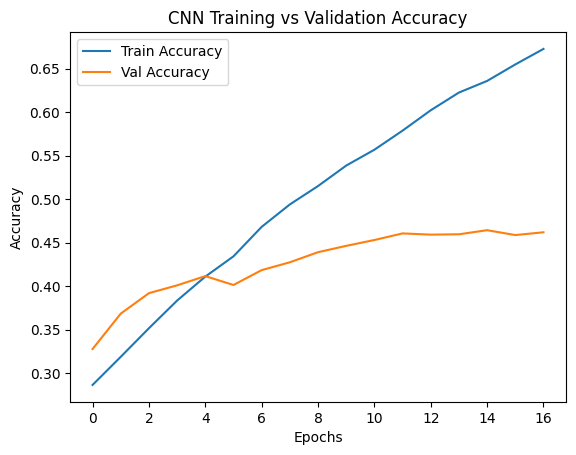

In [22]:
import matplotlib.pyplot as plt
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training vs Validation Accuracy')
plt.show()


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step


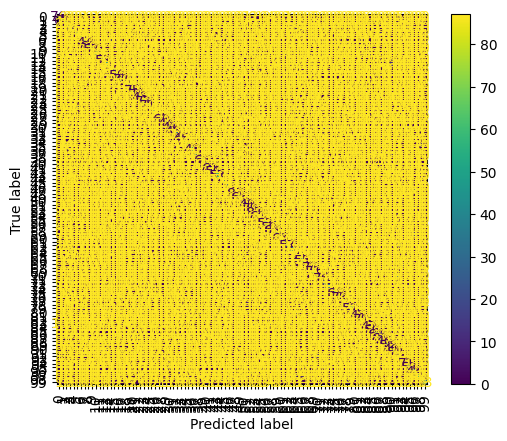

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(cnn_model.predict(cifar100_test_images), axis=1)
cm = confusion_matrix(cifar100_test_labels, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(xticks_rotation=90)
plt.show()


**Prediction Analysis**

Visualize Predictions

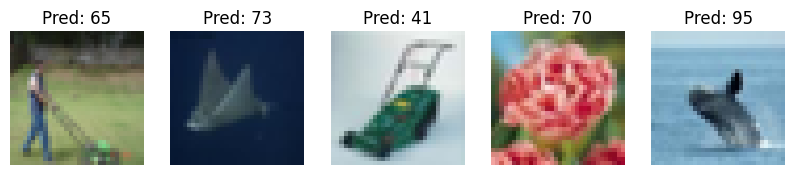

In [25]:
import random

class_names = [str(i) for i in range(100)]

plt.figure(figsize=(10,5))
for i in range(5):
    idx = random.randint(0, len(cifar100_test_images)-1)
    plt.subplot(1,5,i+1)
    plt.imshow(cifar100_test_images[idx])
    plt.title(f"Pred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.show()


## Final Analysis

- The ANN struggled due to loss of spatial information.
- CNN significantly outperformed ANN by learning spatial and color patterns.
- Deeper CNN layers improved feature extraction for complex classes.
- CIFAR-100 is significantly harder than Fashion-MNIST due to:
  - 100 classes
  - Color images
  - High inter-class similarity

### Limitations
- Training is computationally expensive
- Accuracy is limited without transfer learning (e.g., ResNet)

### Conclusion
Model complexity and architecture choice play a critical role when moving from
simple grayscale datasets (Fashion-MNIST) to complex color datasets (CIFAR-100).
CNNs are essential for high-dimensional image classification tasks.
